
## Классификация текстовых данных

<p>Чтобы узнать свой вариант, введите Вашу фамилию на русском языке в соответвующее поле ниже и запустите ячейку:</p>


* Набор рецензий на фильмы (reviews) - <b>positive/negative</b> - <a href="http://www.cs.cornell.edu/people/pabo/movie-review-data/">источник</a> - файл c данными: <b>data/reviews.tsv</b></li>
</ol>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import timeit

## Задача 1
#### Классификация текстовых сообщений (2 балла)

<ol>
    <li>Загрузите исходные данные</li>
    <li>Разбейте загруженные данные на обучающее (train) и тестовое подможества (test)</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр)</li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Мультиномиальный наивный Байес ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации (по доле правильных классификаций) на тестовом подмножестве</li>
    <li>Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве) </li>
</ol>

In [3]:
# random_state = 123 # для всех объектов/методов/моделей
# Параметры логистической регрессии
# penalty = 'l2', fit_intercept=True, max_iter=100, C=1, solver='lbfgs', random_state=12345

In [4]:
df = pd.DataFrame.from_csv('reviews.tsv', index_col=None, header=None, sep='\t')

In [5]:
df.columns = ['type', 'review']

#### К-ближайших соседей 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['review'],df['type'],test_size=0.3 ,random_state=123)
vectorize = TfidfVectorizer()

In [7]:
X_train = vectorize.fit_transform(X_train)
X_test = vectorize.transform(X_test)

In [8]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski')

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
%%timeit
knn.fit(X_train,y_train)

1000 loops, best of 3: 768 µs per loop


In [11]:
y_hat_1 = knn.predict(X_test)

In [12]:
%%timeit
y_hat_1 = knn.predict(X_test)

1 loop, best of 3: 859 ms per loop


In [13]:
print("Доля правильных предсказаний")
accuracy_score(y_test,y_hat_1)

Доля правильных предсказаний


0.71084713973116598

#### Логистическая регрессия

In [14]:
log_reg = LogisticRegression(penalty='l2',fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345)

In [15]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12345, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
%%timeit
log_reg.fit(X_train,y_train)

1 loop, best of 3: 191 ms per loop


In [17]:
y_hat_2 = log_reg.predict(X_test)

In [18]:
%%timeit 
y_hat_2 = log_reg.predict(X_test)

10000 loops, best of 3: 154 µs per loop


In [19]:
accuracy_score(y_test,y_hat_2)

0.76367614879649892

#### Мультиномиальный наивный Байес

In [20]:
mnb = MultinomialNB()

In [21]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
%%timeit
mnb.fit(X_train,y_train)

100 loops, best of 3: 2.51 ms per loop


In [23]:
y_hat_3 = mnb.predict(X_test)

In [24]:
%%timeit
y_hat_3 = mnb.predict(X_test)

1000 loops, best of 3: 418 µs per loop


In [25]:
print("Доля правильных предсказаний")
accuracy_score(y_test,y_hat_3)

Доля правильных предсказаний


0.78211941231634885

## Задача 2.
#### Применение k-folds (3 балла)

<p>Повторите решение задачи 1, но с ипользованием k-folds (k=4) для разделения исходных данных, обучения и тестирования.</p>

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold


In [27]:
kf = KFold(n_splits=4, shuffle=True, random_state=123)

In [28]:
scores = {'knn':[], 'log_reg':[], 'mnb':[]}
for train_ind, test_ind in kf.split(df['review']):
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(df['review'][train_ind])
    X_test = vectorizer.transform(df['review'][test_ind])
    y_train = df['type'][train_ind]
    y_test = df['type'][test_ind]
    
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_hat_knn = knn.predict(X_test)
    scores['knn'].append(accuracy_score(y_test,y_hat_knn))
    
    
    log_reg = LogisticRegression(penalty = 'l2', fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345)
    log_reg.fit(X_train,y_train)
    y_hat_log_reg = log_reg.predict(X_test)
    scores['log_reg'].append(accuracy_score(y_test, y_hat_log_reg))
    

    mnb = MultinomialNB().fit(X_train, y_train)
    mnb.fit(X_train, y_train)
    y_hat_mnb = mnb.predict(X_test)
    scores['mnb'].append(accuracy_score(y_test,y_hat_mnb))
    

In [29]:
scores

{'knn': [0.71605401350337583,
  0.70142535633908476,
  0.69943714821763603,
  0.70919324577861165],
 'log_reg': [0.77156789197299325,
  0.75506376594148539,
  0.74596622889305819,
  0.7639774859287054],
 'mnb': [0.78844711177794446,
  0.76856714178544638,
  0.77786116322701693,
  0.78686679174484053]}

In [35]:
for key in scores.keys():
        print(key,np.mean(scores[key]))
    

knn 0.70652744096
log_reg 0.759143843184
mnb 0.780435552134


## Задача 3.
#### Выбор модели (5 баллов)


<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами: </p>

In [36]:
from sklearn.metrics import make_scorer

In [37]:
kf = KFold(n_splits=4, shuffle=True, random_state=123)

#### K-ближайших соседей

In [38]:
ns = np.arange(1, 150, 20) # количество соседей

In [39]:
result_knn = {}
for i in ns:
    scores_knn = []    
    for train_ind, test_ind in kf.split(df['review']):
        knn = KNeighborsClassifier(n_neighbors=i)
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(df['review'][train_ind])
        X_test = vectorizer.transform(df['review'][test_ind])
        y_train = df['type'][train_ind]
        y_test = df['type'][test_ind]    
        knn.fit(X_train, y_train) 
        y_hat_knn = knn.predict(X_test)       
        scores_knn.append(accuracy_score(y_test,y_hat_knn))
    result_knn.update({i:scores_knn})

In [40]:
print(result_knn)

{141: [0.74793698424606148, 0.73630907726931738, 0.73095684803001881, 0.76810506566604131], 1: [0.66954238559639911, 0.65903975993998498, 0.65590994371482181, 0.67054409005628512], 121: [0.74568642160540133, 0.74718679669917476, 0.72682926829268291, 0.76622889305816133], 21: [0.74943735933983491, 0.71942985746436605, 0.72870544090056288, 0.74746716697936211], 81: [0.75356339084771196, 0.74643660915228804, 0.72945590994371479, 0.76547842401500943], 41: [0.74756189047261812, 0.73668417104276074, 0.73733583489681054, 0.7639774859287054], 61: [0.75206301575393852, 0.74231057764441111, 0.73771106941838649, 0.76660412757973728], 101: [0.74606151537884469, 0.74231057764441111, 0.72645403377110696, 0.7639774859287054]}


In [41]:
from collections import OrderedDict

In [42]:
knn_dict= {}
knn_dict = OrderedDict(sorted(result_knn.items(), key=lambda t: t[0]))
print(knn_dict)

OrderedDict([(1, [0.66954238559639911, 0.65903975993998498, 0.65590994371482181, 0.67054409005628512]), (21, [0.74943735933983491, 0.71942985746436605, 0.72870544090056288, 0.74746716697936211]), (41, [0.74756189047261812, 0.73668417104276074, 0.73733583489681054, 0.7639774859287054]), (61, [0.75206301575393852, 0.74231057764441111, 0.73771106941838649, 0.76660412757973728]), (81, [0.75356339084771196, 0.74643660915228804, 0.72945590994371479, 0.76547842401500943]), (101, [0.74606151537884469, 0.74231057764441111, 0.72645403377110696, 0.7639774859287054]), (121, [0.74568642160540133, 0.74718679669917476, 0.72682926829268291, 0.76622889305816133]), (141, [0.74793698424606148, 0.73630907726931738, 0.73095684803001881, 0.76810506566604131])])


In [43]:
means_knn_gr = [[np.mean(param) for param in knn_dict[key]] for key in knn_dict.keys()]
means_knn = np.mean(means_knn_gr,axis=1)

max_knn_1 = np.max(means_knn)

for m in range(0,len(means_knn)):
    if means_knn[m] == max_knn_1:
        ind = m

n = 0
for key in knn_dict.keys():
    if n == ind:
        best_param_knn_1 = key
        break
    else:
        n+=1
           
print("Best parameter",best_param_knn_1)

Best parameter 61


#### Логистическая регрессия

In [44]:
cs = np.logspace(-2, 10, 8, base=10) # параметр регуляризации

In [45]:
result_log = {}
for i in cs:
    scores_log = []    
    for train_ind, test_ind in kf.split(df['review']):
        log_reg = LogisticRegression(C = i,penalty = 'l2', fit_intercept=True, max_iter=100, solver='lbfgs', random_state=12345)
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(df['review'][train_ind])
        X_test = vectorizer.transform(df['review'][test_ind])
        y_train = df['type'][train_ind]
        y_test = df['type'][test_ind]    
        log_reg.fit(X_train, y_train) 
        y_hat_log_reg = log_reg.predict(X_test)       
        scores_log.append(accuracy_score(y_test,y_hat_log_reg))
    result_log.update({i:scores_log})

In [46]:
print(result_log)

{0.51794746792312096: [0.7603150787696924, 0.7441860465116279, 0.74333958724202631, 0.75797373358348963], 71968.567300115144: [0.75656414103525882, 0.74343585896474118, 0.73696060037523448, 0.76172607879924958], 193069772.88832456: [0.75993998499624904, 0.74343585896474118, 0.73996247654784242, 0.76247654784240149], 10000000000.0: [0.75393848462115531, 0.74193548387096775, 0.73808630393996244, 0.76060037523452162], 3727593.7203149381: [0.76331582895723926, 0.74193548387096775, 0.73508442776735461, 0.76285178236397744], 26.826957952797247: [0.77156789197299325, 0.75393848462115531, 0.74221388367729835, 0.77260787992495306], 0.01: [0.70667666916729177, 0.69092273068267063, 0.68855534709193245, 0.69380863039399621], 1389.4954943731361: [0.76069017254313576, 0.73930982745686424, 0.73621013133208257, 0.76172607879924958]}


In [47]:
log_dict= {}
log_dict = OrderedDict(sorted(result_log.items(), key=lambda t: t[0]))
print(log_dict)

OrderedDict([(0.01, [0.70667666916729177, 0.69092273068267063, 0.68855534709193245, 0.69380863039399621]), (0.51794746792312096, [0.7603150787696924, 0.7441860465116279, 0.74333958724202631, 0.75797373358348963]), (26.826957952797247, [0.77156789197299325, 0.75393848462115531, 0.74221388367729835, 0.77260787992495306]), (1389.4954943731361, [0.76069017254313576, 0.73930982745686424, 0.73621013133208257, 0.76172607879924958]), (71968.567300115144, [0.75656414103525882, 0.74343585896474118, 0.73696060037523448, 0.76172607879924958]), (3727593.7203149381, [0.76331582895723926, 0.74193548387096775, 0.73508442776735461, 0.76285178236397744]), (193069772.88832456, [0.75993998499624904, 0.74343585896474118, 0.73996247654784242, 0.76247654784240149]), (10000000000.0, [0.75393848462115531, 0.74193548387096775, 0.73808630393996244, 0.76060037523452162])])


In [48]:
means_log_gr = [[np.mean(param) for param in log_dict[key]] for key in log_dict.keys()]
means_log = np.mean(means_log_gr,axis=1)

max_log_1 = np.max(means_log)

for m in range(0,len(means_log)):
    if means_log[m] == max_log_1:
        ind = m

n = 0
for key in log_dict.keys():
    if n == ind:
        best_param_log_1 = key
        break
    else:
        n+=1
           
print("Best parameter",best_param_log_1)

Best parameter 26.8269579528


#### Мультиномиальный наивный Байес

In [49]:
alphas = np.logspace(-4, 1, 8, base=10) # сглаживающий параметр

In [50]:
result_mnb = {}
for k in alphas:
    scores_mnb = []    
    for train_ind, test_ind in kf.split(df['review']):
        mnb = MultinomialNB(alpha = k)
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(df['review'][train_ind])
        X_test = vectorizer.transform(df['review'][test_ind])
        y_train = df['type'][train_ind]
        y_test = df['type'][test_ind]    
        mnb.fit(X_train, y_train) 
        y_hat_mnb = mnb.predict(X_test)       
        scores_mnb.append(accuracy_score(y_test,y_hat_mnb))
    result_mnb.update({k:scores_mnb})

In [51]:
print(result_mnb)

{0.071968567300115208: [0.74756189047261812, 0.74718679669917476, 0.76547842401500943, 0.75947467166979366], 0.37275937203149417: [0.77569392348087018, 0.76369092273068262, 0.77711069418386491, 0.775609756097561], 0.013894954943731374: [0.72730682670667668, 0.72843210802700675, 0.74521575984990618, 0.74183864915572229], 1.9306977288832496: [0.78957239309827454, 0.7629407351837959, 0.77260787992495306, 0.78761726078799255], 0.0001: [0.70892723180795203, 0.71230307576894225, 0.72345215759849901, 0.72795497185741087], 0.0026826957952797272: [0.71605401350337583, 0.71867966991747934, 0.7302063789868668, 0.73283302063789868], 10.0: [0.7764441110277569, 0.75168792198049517, 0.75647279549718571, 0.7722326454033771], 0.0005179474679231213: [0.70892723180795203, 0.71267816954238561, 0.72457786116322698, 0.72908067542213884]}


In [52]:
mnb_dict= {}
mnb_dict = OrderedDict(sorted(result_mnb.items(), key=lambda t: t[0]))
print(mnb_dict)

OrderedDict([(0.0001, [0.70892723180795203, 0.71230307576894225, 0.72345215759849901, 0.72795497185741087]), (0.0005179474679231213, [0.70892723180795203, 0.71267816954238561, 0.72457786116322698, 0.72908067542213884]), (0.0026826957952797272, [0.71605401350337583, 0.71867966991747934, 0.7302063789868668, 0.73283302063789868]), (0.013894954943731374, [0.72730682670667668, 0.72843210802700675, 0.74521575984990618, 0.74183864915572229]), (0.071968567300115208, [0.74756189047261812, 0.74718679669917476, 0.76547842401500943, 0.75947467166979366]), (0.37275937203149417, [0.77569392348087018, 0.76369092273068262, 0.77711069418386491, 0.775609756097561]), (1.9306977288832496, [0.78957239309827454, 0.7629407351837959, 0.77260787992495306, 0.78761726078799255]), (10.0, [0.7764441110277569, 0.75168792198049517, 0.75647279549718571, 0.7722326454033771])])


In [53]:
means_mnb_gr = [[np.mean(param) for param in mnb_dict[key]] for key in mnb_dict.keys()]
means_mnb = np.mean(means_mnb_gr,axis=1)

max_mnb_1 = np.max(means_mnb)

for m in range(0,len(means_mnb)):
    if means_mnb[m] == max_mnb_1:
        ind = m

n = 0
for key in mnb_dict.keys():
    if n == ind:
        best_param_mnb_1 = key
        break
    else:
        n+=1
           
print("Best parameter",best_param_mnb_1)

Best parameter 1.93069772888


<p style="padding-left:15px;">3. Постройте графики (параметры модели)-(доля правильных классификаций) при обучении и валидации <br>
4. Выберите лучшую модель для каждого метода, используя значение качества классификации (использовать долю правильных классификаций)<br>
5. Выбранные модели обучите на обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)<br>
6. Повторите шаги 2-4 для n-gram=2<br>
7. Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)<br>
8. Сделайте выводы по полученным результатам (преимущества и недостатки методов)
</p>

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
random_state = 123 # для всех объектов/методов/моделей

#### Построение графиков

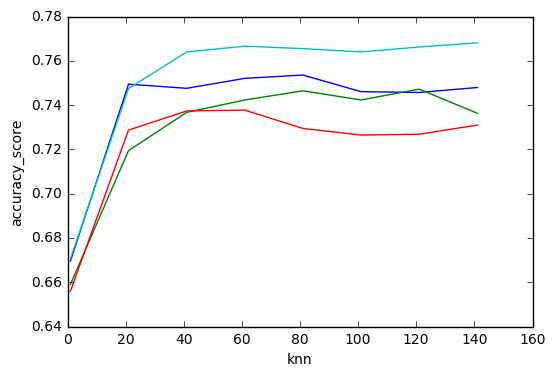

In [55]:
plt.plot(ns,means_knn_gr)
plt.ylabel('accuracy_score')
plt.xlabel('knn')

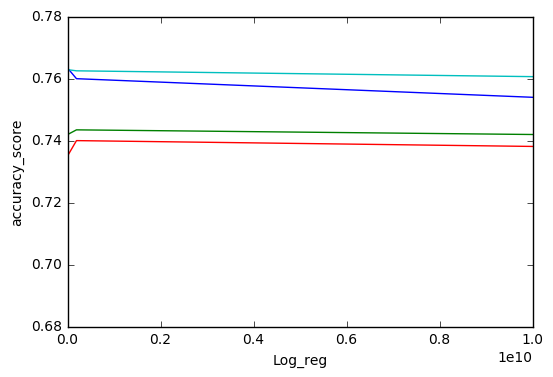

In [56]:
plt.plot(cs,means_log_gr)
plt.ylabel('accuracy_score')
plt.xlabel('Log_reg')

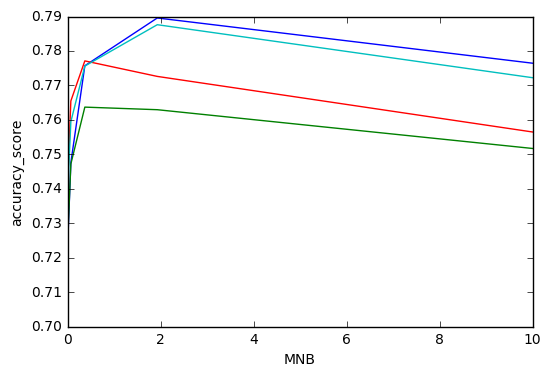

In [57]:
plt.plot(alphas,means_mnb_gr)
plt.ylabel('accuracy_score')
plt.xlabel('MNB')

### Выбор луччшей модели
##### 1) Для K-neighbors получаем лучшую модель при n_neighbors = 61
##### 2) Для LogisticRegression получаем лучшую модель при C = 26.8269579528
##### 3) Для MultinomialNB получаем лучшую модель при alpha = 1.93069772888


### Обучим выбранные модели

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df['review'],df['type'],test_size=0.3 ,random_state=123)
vectorize = TfidfVectorizer()
X_train = vectorize.fit_transform(X_train)
X_test = vectorize.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=61)
log_reg = LogisticRegression(C=26.8269579528)
mnb = MultinomialNB(alpha=1.93069772888)

In [59]:
%%timeit -o
knn.fit(X_train,y_train)

1000 loops, best of 3: 845 µs per loop


<TimeitResult : 1000 loops, best of 3: 845 µs per loop>

In [60]:
t_fit_knn_1 = _

In [61]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=61, p=2,
           weights='uniform')

In [62]:
%%timeit -o
log_reg.fit(X_train,y_train)

10 loops, best of 3: 94.5 ms per loop


<TimeitResult : 10 loops, best of 3: 94.5 ms per loop>

In [63]:
t_fit_log_1 = _

In [64]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=26.8269579528, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [65]:
%%timeit -o
mnb.fit(X_train,y_train)

100 loops, best of 3: 2.54 ms per loop


<TimeitResult : 100 loops, best of 3: 2.54 ms per loop>

In [66]:
t_fit_mnb_1 = _

In [67]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.93069772888, class_prior=None, fit_prior=True)

In [68]:
%%timeit -o
y_hat_knn = knn.predict(X_test)

1 loop, best of 3: 929 ms per loop


<TimeitResult : 1 loop, best of 3: 929 ms per loop>

In [69]:
t_pred_knn_1 = _

In [70]:
y_hat_knn = knn.predict(X_test)

In [71]:
%%timeit -o
y_hat_log = log_reg.predict(X_test)

10000 loops, best of 3: 158 µs per loop


<TimeitResult : 10000 loops, best of 3: 158 µs per loop>

In [72]:
t_pred_log_1 = _

In [73]:
y_hat_log = log_reg.predict(X_test)

In [74]:
%%timeit -o
y_hat_mnb = mnb.predict(X_test)

1000 loops, best of 3: 435 µs per loop


<TimeitResult : 1000 loops, best of 3: 435 µs per loop>

In [75]:
t_pred_mnb_1 = _

In [76]:
y_pred_mnb = _

In [77]:
y_hat_mnb = mnb.predict(X_test)

In [78]:
ac_knn_1 = accuracy_score(y_test,y_hat_knn)
ac_log_1 = accuracy_score(y_test,y_hat_log)
ac_mnb_1 = accuracy_score(y_test,y_hat_mnb)


print("knn",ac_knn_1)
print("log_reg",ac_log_1)
print("MNB",ac_mnb_1)


knn 0.754298218193
log_reg 0.768990309472
MNB 0.778368240075


#### Повторим пункты 2-4 для n-gramm = 2

#### K-neighbors , n-gramm = 2

In [79]:
result_knn = {}
for i in ns:
    scores_knn = []    
    for train_ind, test_ind in kf.split(df['review']):
        knn = KNeighborsClassifier(n_neighbors=i)
        vectorizer = TfidfVectorizer(ngram_range=(2,2))
        X_train = vectorizer.fit_transform(df['review'][train_ind])
        X_test = vectorizer.transform(df['review'][test_ind])
        y_train = df['type'][train_ind]
        y_test = df['type'][test_ind]    
        knn.fit(X_train, y_train) 
        y_hat_knn = knn.predict(X_test)       
        scores_knn.append(accuracy_score(y_test,y_hat_knn))
    result_knn.update({i:scores_knn})

In [80]:
knn_dict= {}
knn_dict = OrderedDict(sorted(result_knn.items(), key=lambda t: t[0]))
print(knn_dict)

OrderedDict([(1, [0.5, 0.50750187546886727, 0.49943714821763602, 0.51294559099437154]), (21, [0.57276819204801199, 0.6552888222055514, 0.6303939962476548, 0.60525328330206374]), (41, [0.64666166541635406, 0.67666916729182292, 0.66266416510318948, 0.65403377110694183]), (61, [0.66316579144786192, 0.66616654163540889, 0.65365853658536588, 0.66041275797373356]), (81, [0.65791447861965491, 0.65603900975243812, 0.64990619136960603, 0.66041275797373356]), (101, [0.66354088522130528, 0.66466616654163546, 0.64502814258911823, 0.64953095684802997]), (121, [0.65041260315078775, 0.66504126031507882, 0.63489681050656666, 0.64727954971857415]), (141, [0.65303825956489125, 0.65866466616654162, 0.63377110694183869, 0.64015009380863042])])


In [81]:
means_knn_gr = [[np.mean(param) for param in knn_dict[key]] for key in knn_dict.keys()]
means_knn = np.mean(means_knn_gr,axis=1)

max_knn_2 = np.max(means_knn)

for m in range(0,len(means_knn)):
    if means_knn[m] == max_knn_2:
        ind = m

n = 0
for key in knn_dict.keys():
    if n == ind:
        best_param_knn_2 = key
        break
    else:
        n+=1
           
print("Best parameter",best_param_knn_2)

Best parameter 61


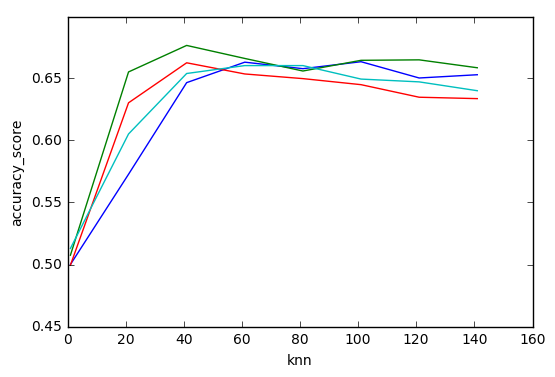

In [82]:
plt.plot(ns,means_knn_gr)
plt.ylabel('accuracy_score')
plt.xlabel('knn')

#### LogisticRegression , n-gramm = 2

In [83]:
result_log = {}
for i in cs:
    scores_log = []    
    for train_ind, test_ind in kf.split(df['review']):
        log_reg = LogisticRegression(C = i,penalty = 'l2', fit_intercept=True, max_iter=100, solver='lbfgs', random_state=12345)
        vectorizer = TfidfVectorizer(ngram_range=(2,2))
        X_train = vectorizer.fit_transform(df['review'][train_ind])
        X_test = vectorizer.transform(df['review'][test_ind])
        y_train = df['type'][train_ind]
        y_test = df['type'][test_ind]    
        log_reg.fit(X_train, y_train) 
        y_hat_log_reg = log_reg.predict(X_test)       
        scores_log.append(accuracy_score(y_test,y_hat_log_reg))
    result_log.update({i:scores_log})

In [84]:
log_dict= {}
log_dict = OrderedDict(sorted(result_log.items(), key=lambda t: t[0]))
print(log_dict)

OrderedDict([(0.01, [0.65041260315078775, 0.66991747936984247, 0.58911819887429639, 0.59437148217636027]), (0.51794746792312096, [0.69317329332333089, 0.70442610652663162, 0.6971857410881801, 0.69756097560975605]), (26.826957952797247, [0.71417854463615904, 0.70330082520630155, 0.70694183864915572, 0.71932457786116322]), (1389.4954943731361, [0.71230307576894225, 0.70255063765941483, 0.70731707317073167, 0.72270168855534711]), (71968.567300115144, [0.71267816954238561, 0.70217554388597148, 0.70731707317073167, 0.72157598499061915]), (3727593.7203149381, [0.71042760690172546, 0.70517629407351834, 0.70656660412757977, 0.71557223264540337]), (193069772.88832456, [0.70667666916729177, 0.70442610652663162, 0.7088180112570357, 0.71482176360225136]), (10000000000.0, [0.70967741935483875, 0.70367591897974491, 0.70694183864915572, 0.71181988742964353])])


In [85]:
means_log_gr = [[np.mean(param) for param in log_dict[key]] for key in log_dict.keys()]
means_log = np.mean(means_log_gr,axis=1)

max_log_2 = np.max(means_log)

for m in range(0,len(means_log)):
    if means_log[m] == max_log_2:
        ind = m

n = 0
for key in log_dict.keys():
    if n == ind:
        best_param_log_2 = key
        break
    else:
        n+=1
           
print("Best parameter",best_param_log_2)

Best parameter 1389.49549437


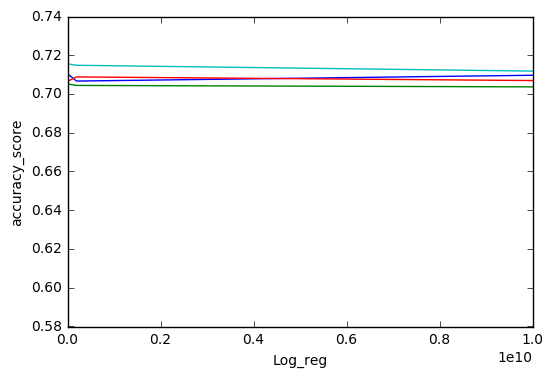

In [86]:
plt.plot(cs,means_log_gr)
plt.ylabel('accuracy_score')
plt.xlabel('Log_reg')

#### MultinomialNB, n-gramm = 2

In [87]:
result_mnb = {}
for k in alphas:
    scores_mnb = []    
    for train_ind, test_ind in kf.split(df['review']):
        mnb = MultinomialNB(alpha = k)
        vectorizer = TfidfVectorizer(ngram_range=(2,2))
        X_train = vectorizer.fit_transform(df['review'][train_ind])
        X_test = vectorizer.transform(df['review'][test_ind])
        y_train = df['type'][train_ind]
        y_test = df['type'][test_ind]    
        mnb.fit(X_train, y_train) 
        y_hat_mnb = mnb.predict(X_test)       
        scores_mnb.append(accuracy_score(y_test,y_hat_mnb))
    result_mnb.update({k:scores_mnb})

In [88]:
mnb_dict= {}
mnb_dict = OrderedDict(sorted(result_mnb.items(), key=lambda t: t[0]))
print(mnb_dict)

OrderedDict([(0.0001, [0.69992498124531133, 0.69954988747186797, 0.69118198874296433, 0.71106941838649151]), (0.0005179474679231213, [0.69879969992498125, 0.69692423105776447, 0.69118198874296433, 0.71031894934333961]), (0.0026826957952797272, [0.69992498124531133, 0.70030007501875469, 0.6930581613508443, 0.71332082551594744]), (0.013894954943731374, [0.70667666916729177, 0.70292573143285819, 0.70206378986866791, 0.7178236397748593]), (0.071968567300115208, [0.7100525131282821, 0.70967741935483875, 0.7178236397748593, 0.72682926829268291]), (0.37275937203149417, [0.72130532633158284, 0.72130532633158284, 0.72457786116322698, 0.73208255159474667]), (1.9306977288832496, [0.71755438859714926, 0.71342835708927232, 0.71969981238273917, 0.72833020637898682]), (10.0, [0.70255063765941483, 0.70592648162040506, 0.70431519699812384, 0.71519699812382742])])


In [89]:
means_mnb_gr = [[np.mean(param) for param in mnb_dict[key]] for key in mnb_dict.keys()]
means_mnb = np.mean(means_mnb_gr,axis=1)

max_mnb_2 = np.max(means_mnb)

for m in range(0,len(means_mnb)):
    if means_mnb[m] == max_mnb_2:
        ind = m

n = 0
for key in mnb_dict.keys():
    if n == ind:
        best_param_mnb_2 = key
        break
    else:
        n+=1
           
print("Best parameter",best_param_mnb_2)

Best parameter 0.372759372031


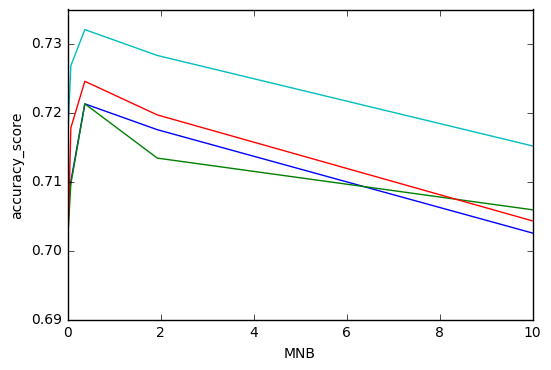

In [90]:
plt.plot(alphas,means_mnb_gr)
plt.ylabel('accuracy_score')
plt.xlabel('MNB')

### Выбор луччшей модели
##### 1) Для K-neighbors получаем лучшую модель при n_neighbors = 61
##### 2) Для LogisticRegression получаем лучшую модель при C =  1389.49549437
##### 3) Для MultinomialNB получаем лучшую модель при alpha = 0.372759372031

### Обучим выбранные модели

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df['review'],df['type'],test_size=0.3 ,random_state=123)
vectorize = TfidfVectorizer(ngram_range=(2,2))
X_train = vectorize.fit_transform(X_train)
X_test = vectorize.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=61)
log_reg = LogisticRegression(C=1389.49549437)
mnb = MultinomialNB(alpha=0.372759372031)

In [92]:
%%timeit -o
knn.fit(X_train,y_train)

1000 loops, best of 3: 862 µs per loop


<TimeitResult : 1000 loops, best of 3: 862 µs per loop>

In [93]:
t_fit_knn_2 = _

In [94]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=61, p=2,
           weights='uniform')

In [95]:
%%timeit -o
log_reg.fit(X_train,y_train)

10 loops, best of 3: 133 ms per loop


<TimeitResult : 10 loops, best of 3: 133 ms per loop>

In [96]:
t_fit_log_2 = _

In [97]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1389.49549437, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [98]:
%%timeit -o
mnb.fit(X_train,y_train)

100 loops, best of 3: 6.45 ms per loop


<TimeitResult : 100 loops, best of 3: 6.45 ms per loop>

In [99]:
t_fit_mnb_2 = _

In [100]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=0.372759372031, class_prior=None, fit_prior=True)

In [101]:
%%timeit -o
knn.predict(X_test)

1 loop, best of 3: 397 ms per loop


<TimeitResult : 1 loop, best of 3: 397 ms per loop>

In [102]:
t_pred_knn_2 = _

In [103]:
y_hat_knn = knn.predict(X_test)

In [104]:
%%timeit -o
log_reg.predict(X_test)

The slowest run took 5.18 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 131 µs per loop


<TimeitResult : 10000 loops, best of 3: 131 µs per loop>

In [105]:
t_pred_log_2 = _

In [106]:
y_hat_log = log_reg.predict(X_test)

In [107]:
%%timeit -o
mnb.predict(X_test)

1000 loops, best of 3: 1.14 ms per loop


<TimeitResult : 1000 loops, best of 3: 1.14 ms per loop>

In [108]:
t_pred_mnb_2 = _

In [109]:
y_hat_mnb = mnb.predict(X_test)

In [110]:
ac_knn_1 = accuracy_score(y_test,y_hat_knn)
ac_log_1 = accuracy_score(y_test,y_hat_log)
ac_mnb_1 = accuracy_score(y_test,y_hat_mnb)


print("knn",ac_knn_1)
print("log_reg",ac_log_1)
print("MNB",ac_mnb_1)

knn 0.662081900594
log_reg 0.706470772116
MNB 0.71772428884


#### Выведем данные по моделям

In [111]:
print("Метод - KNeighbors")
print("n-gramm - 1")
print("Значение параметра -",best_param_knn_1) 
print("Время обучение - ",t_fit_knn_1.best)
print("Время предсказания - ",t_pred_knn_1.best)
print("Доля правильных ответов - ",max_knn_1)

print("Метод - KNeighbors")
print("n-gramm - 2")
print("Значение параметра - ",best_param_knn_2)
print("Время обучение - ",t_fit_knn_2.best)
print("Время предсказания - ",t_pred_knn_2.best)
print("Доля правильных ответов - ",max_knn_2)

print("Метод - LogisticRegression")
print("n-gramm - 1")
print("Значение параметра - ",best_param_log_1)
print("Время обучение - ",t_fit_log_1.best)
print("Время предсказания - ",t_pred_log_1.best)
print("Доля правильных ответов - ",max_log_1)

print("Метод - LogisticRegression")
print("n-gramm -  2")
print("Значение параметра - ",best_param_log_2)
print("Время обучение - ",t_fit_log_2.best)
print("Время предсказания - ",t_pred_log_2.best)
print("Доля правильных ответов - ",max_log_2)

print("Метод - MultinomialNB")
print("n-gramm -  1")
print("Значение параметра - ",best_param_mnb_1)
print("Время обучение - ",t_fit_mnb_1.best)
print("Время предсказания - ",t_pred_mnb_1.best)
print("Доля правильных ответов - ",max_mnb_1)

print("Метод - MultinomialNB")
print("n-gramm -  2")
print("Значение параметра - ",best_param_mnb_2)
print("Время обучение - ",t_fit_mnb_2.best)
print("Время предсказания - ",t_pred_mnb_2.best)
print("Доля правильных ответов - ",max_mnb_2)

Метод - KNeighbors
n-gramm - 1
Значение параметра - 61
Время обучение -  0.0008446778994957071
Время предсказания -  0.9290780724179513
Доля правильных ответов -  0.749672197599
Метод - KNeighbors
n-gramm - 2
Значение параметра -  61
Время обучение -  0.0008622443680189348
Время предсказания -  0.3970236191572667
Доля правильных ответов -  0.660850906911
Метод - LogisticRegression
n-gramm - 1
Значение параметра -  26.8269579528
Время обучение -  0.0944838135839177
Время предсказания -  0.00015790940632085722
Доля правильных ответов -  0.760082035049
Метод - LogisticRegression
n-gramm -  2
Значение параметра -  1389.49549437
Время обучение -  0.1331435923731931
Время предсказания -  0.00013097845163986222
Доля правильных ответов -  0.711218118789
Метод - MultinomialNB
n-gramm -  1
Значение параметра -  1.93069772888
Время обучение -  0.002540918154658698
Время предсказания -  0.0004348345517672669
Доля правильных ответов -  0.778184567249
Метод - MultinomialNB
n-gramm -  2
Значение пара

### Выводы

 В ходе выполнения домашнего задания я проверил модели K-neigbors, LogisticRegression, MultinomialNB и сделал следующие выводы на основе получившихся измеренных данных
  для n-gramm = 1
      Наибольшую долю правильных ответов имеет MultinomialNB, а наименьшую - K-neigbors. Что же касается времени обучения, меньше всего оно у K-neigbors, а больше всего у LogisticRegression.Так же можно заметить ,что время предсказания наибольшее у K-neigbors, а нименьшее у LogisticRegression
      для n-gramm = 2
        В это же время доля правильных ответов имеет такую же расстановку, как и при n-gramm = 1, но сами доли стали меньше.Что же касается времени обучения, меньше всего оно у K-neigbors, а больше всего у LogisticRegression.Так же можно заметить ,что время предсказания наибольшее у K-neigbors, а нименьшее у LogisticRegression 

## Задача 4. (опционально)
#### Исследование влияния количества признаков FeatureHasher на качество классификации (5 баллов к сумме по всем ДЗ) 

<p>Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием, если</p>

In [ ]:
n_features = np.logspace(1, 5, 5, base=10) # количество признаков
non_negative=True

<p>Можно воспользоваться GridSearchCV</p>